In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing Lung Cancer Data

In [3]:
df=pd.read_csv('Lung Cancer.csv')

In [4]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,No,No,Yes,No,Chemotherapy,2017-09-10,No
1,2,50,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,Yes,Yes,No,No,Surgery,2024-06-17,Yes
2,3,65,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,Yes,Yes,No,No,Combined,2024-04-09,No
3,4,51,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,Yes,Yes,No,No,Chemotherapy,2017-04-23,No
4,5,37,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,No,No,No,No,Combined,2025-01-08,No


***Checking Data***

In [8]:
df.shape

(890000, 17)

In [9]:
df.describe()

,id,age,bmi,cholesterol_level
count,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916
std,256921.014128,9.994485,8.368539,43.432278
min,1.000000,4.000000,16.000000,150.000000
25%,222500.750000,48.000000,23.300000,196.000000
50%,445000.500000,55.000000,30.500000,242.000000
75%,667500.250000,62.000000,37.700000,271.000000
max,890000.000000,104.000000,45.000000,300.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  object 
 11  asthma              890000 non-null  object 
 12  cirrhosis           890000 non-null  object 
 13  other_cancer        890000 non-null  object 
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [12]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

***Data has been checked and now start for insights***

In [35]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,Survived_num
0,1,64,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,No,No,Yes,No,Chemotherapy,2017-09-10,No,0
1,2,50,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,Yes,Yes,No,No,Surgery,2024-06-17,Yes,1
2,3,65,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,Yes,Yes,No,No,Combined,2024-04-09,No,0
3,4,51,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,Yes,Yes,No,No,Chemotherapy,2017-04-23,No,0
4,5,37,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,No,No,No,No,Combined,2025-01-08,No,0


***Treatment & Outcome Insights***

In [43]:
#Which treatment type has the highest survival rate?
def survival_rate (x) :
    if x =='Yes':            #--converting yes/no to 1/0
        return 1
    else:
        return 0

df['Survived_num']= df['survived'].apply(survival_rate)
# Group by treatment type and calculate survival rate
highest_survival_rate=df.groupby('treatment_type') ['Survived_num'].mean().multiply(100).round(2).sort_values(ascending=False)

print(highest_survival_rate)

treatment_type
Surgery         22.15
Radiation       22.06
Combined        22.01
Chemotherapy    21.87
Name: Survived_num, dtype: float64


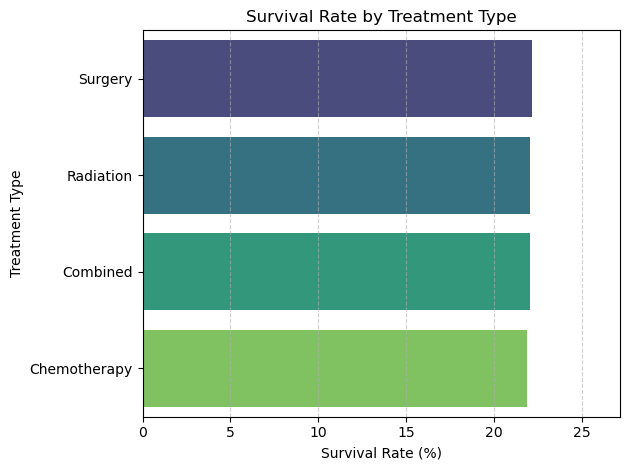

<Figure size 640x480 with 0 Axes>

In [195]:
plot_survival_rate = highest_survival_rate.reset_index(name='survival_rate')
sns.barplot(y='treatment_type', x='survival_rate', data=plot_survival_rate, palette='viridis', hue='treatment_type')
plt.title("Survival Rate by Treatment Type")
plt.xlabel("Survival Rate (%)")
plt.ylabel("Treatment Type")
plt.xlim(0, plot_survival_rate['survival_rate'].max() + 5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig("Survival Rate By Treatment.png")


In [81]:
#Which cancer stages have the lowest survival rates?
stages_survival=df.groupby('cancer_stage') ['Survived_num'].mean().multiply(100).round(2)
stages= stages_survival.reset_index(name='survival_rate').min()
print(stages)

cancer_stage     Stage I
survival_rate      21.81
dtype: object


In [90]:
#How do comorbidities (asthma, cirrhosis, hypertension) affect survival?
comorbidity_cols = ['asthma', 'cirrhosis', 'hypertension', 'other_cancer']
df[comorbidity_cols] = df[comorbidity_cols].replace({1: 'Yes', 0: 'No'})

for comorbidities in ['asthma', 'cirrhosis', 'hypertension', 'other_cancer']:
    print(f"\nsurival_rate by {comorbidities.title()}:")
    result= (df.groupby(comorbidities) ['Survived_num'].mean().multiply(100).round(2))
    print(result)


surival_rate by Asthma:
asthma
No     22.09
Yes    21.94
Name: Survived_num, dtype: float64

surival_rate by Cirrhosis:
cirrhosis
No     21.98
Yes    22.17
Name: Survived_num, dtype: float64

surival_rate by Hypertension:
hypertension
No     22.02
Yes    22.02
Name: Survived_num, dtype: float64

surival_rate by Other_Cancer:
other_cancer
No     22.05
Yes    21.76
Name: Survived_num, dtype: float64


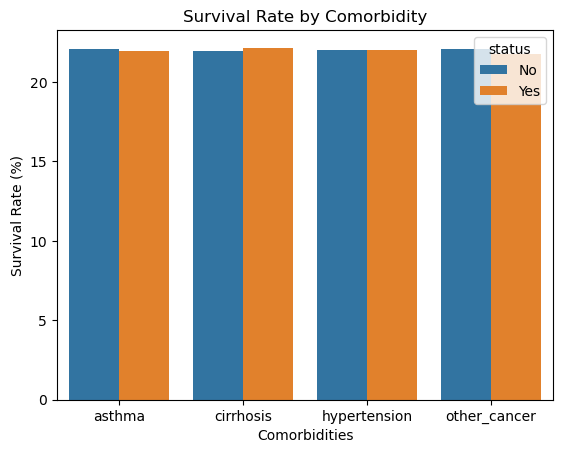

In [192]:
commo_surive=df.melt(id_vars='Survived_num', value_vars=comorbidity_cols, var_name='condition', value_name='status')
comorbidities_survival_rate = (commo_surive.groupby(['condition','status']) ['Survived_num'].mean().reset_index())
comorbidities_survival_rate['Survived_num'] = (comorbidities_survival_rate['Survived_num']*100).round(2)
sns.barplot(x='condition', y='Survived_num', data=comorbidities_survival_rate, hue='status')
plt.title("Survival Rate by Comorbidity")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Comorbidities")
plt.savefig("Survival Rate By Comorbidity.png")

***Predictive/Trend Analysis***

In [142]:
#Which months or years show spikes in diagnosis?
df['diagnosis_date']= pd.to_datetime(df['diagnosis_date'])
df['diagnosis_year']= df['diagnosis_date'].dt.year
df['diagnosis_month']= df['diagnosis_date'].dt.month_name()
yearly_counts= df['diagnosis_year'].value_counts().sort_index()
monthly_counts= df['diagnosis_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

In [149]:
matrix_year_month = pd.pivot_table(
    df,
    index='diagnosis_month',
    columns='diagnosis_year',
    aggfunc='size',
    fill_value=0
)
matrix_year_month

diagnosis_year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
diagnosis_month,,,,,,,,,,,
April,0,7241,7324,7288,7217,7361,7205,7307,7216,7358,7216
August,7552,7608,7540,7589,7530,7699,7524,7440,7543,7592,0
December,7462,7691,7609,7497,7537,7567,7609,7614,7581,7486,0
February,0,6843,6927,6650,6790,6754,7010,6801,6871,6815,7090
January,0,7654,7586,7454,7523,7646,7544,7663,7470,7605,7766
July,7496,7523,7622,7585,7447,7601,7762,7517,7649,7539,0
June,6988,7238,7205,7300,7335,7449,7322,7430,7318,7257,0
March,0,7509,7625,7602,7537,7495,7667,7554,7493,7633,7596
May,0,7564,7519,7643,7556,7581,7536,7634,7539,7488,7497


In [197]:
#Which patient segment (age + stage + comorbidity) is highest risk?
def age_group(age):
    if age <= 20:
        return '0–20'
    elif age <= 40:
        return '21–40'     #age_group divided 
    elif age <= 60:
        return '41–60'
    elif age <= 70:
        return '61–70'
    else:
        return '81+'

df['age_group'] = df['age'].apply(age_group)   #apply to column

df['Survived_num'] = df['survived'].apply(lambda x: 1 if x == 'Yes' else 0)  #yes/no to 1/0


segment_survival = (
    df.groupby(['age_group', 'cancer_stage', 'asthma', 'cirrhosis', 'hypertension', 'other_cancer'])['Survived_num']
    .mean()
    .reset_index()
    .rename(columns={'Survived_num': 'survival_rate'})
)

# Convert to percentage
segment_survival['survival_rate'] = (segment_survival['survival_rate'] * 100).round(2)


highest_risk_segment = segment_survival.sort_values(by='survival_rate').head(10)
print(highest_risk_segment)

    age_group cancer_stage asthma cirrhosis hypertension other_cancer  \
1        0–20      Stage I     No        No           No          Yes   
3        0–20      Stage I     No        No          Yes          Yes   
39       0–20     Stage IV    Yes        No          Yes          Yes   
5        0–20      Stage I     No       Yes          Yes           No   
42       0–20     Stage IV    Yes       Yes          Yes          Yes   
256       81+     Stage II     No       Yes           No          Yes   
30       0–20    Stage III    Yes       Yes           No           No   
37       0–20     Stage IV    Yes        No           No           No   
15       0–20     Stage II     No       Yes           No           No   
17       0–20     Stage II     No       Yes          Yes           No   

     survival_rate  
1              0.0  
3              0.0  
39             0.0  
5              0.0  
42             0.0  
256            0.0  
30             0.0  
37             0.0  
15     

In [176]:
segment_survival.head()

,age_group,cancer_stage,asthma,cirrhosis,hypertension,other_cancer,survival_rate
0,0–20,Stage I,No,No,No,No,42.86
1,0–20,Stage I,No,No,No,Yes,0.00
2,0–20,Stage I,No,No,Yes,No,25.00
3,0–20,Stage I,No,No,Yes,Yes,0.00
4,0–20,Stage I,No,Yes,No,No,100.00


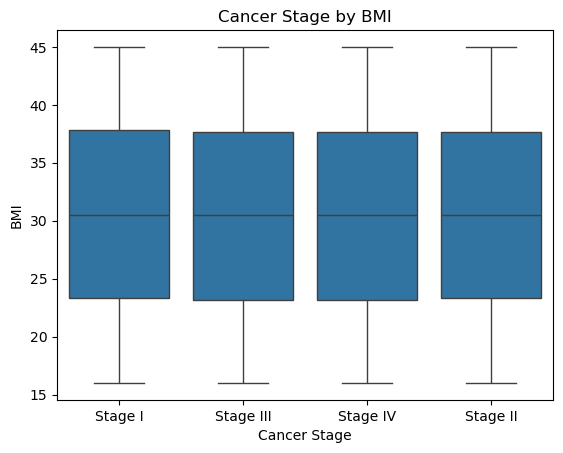

In [196]:
sns.boxplot(y='bmi', x='cancer_stage', data=df)
plt.title("Cancer Stage by BMI")
plt.ylabel("BMI")
plt.xlabel("Cancer Stage")
plt.savefig("Cancer stage by BMI.png")